<a href="https://colab.research.google.com/github/gani0325/2021/blob/main/Image%20processing/%EC%98%81%EC%83%81%EC%B2%98%EB%A6%AC%EA%B3%B5%EB%B6%80/%EC%98%81%EC%83%81%EC%B2%98%EB%A6%AC_OpenCV_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B0%8F_%EB%8F%99%EC%98%81%EC%83%81_%EC%9D%BD%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 영상처리_OpenCV_이미지 및 동영상 읽기

https://alpaca-gt.tistory.com/42

## 1. 이미지 읽기

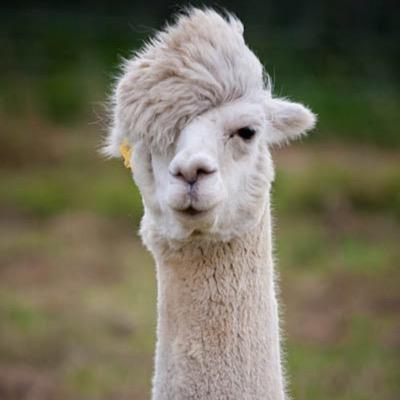

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# 이미지 경로
img_file = "/content/drive/MyDrive/가은/2022/img/sample.jpeg"
# 이미지 변수 할당
img = cv2.imread(img_file)

# 이미지 화면에 표시
cv2_imshow(img)
# 키가 입력이 될 때까지 대기
cv2.waitKey()
# 창 모두 닫기
cv2.destroyAllWindows()

cv2.imread(path, flag)
path: 이미지 파일 경로
flag: 이미지를 어떻게 읽을지 방식 설정
- cv2.IMREAD_COLOR(기본값) : 색깔 이미지로 불러옵니다. 이때 투명도(alpha값)는 무시,  3 채널, BGR 이미지 사용
- cv2.IMREAD_GRAYSCALE : 이미지를 흑백톤으로 불러오기,  1 채널, 그레이스케일 적용
- cv2.IMREAD_UNCHANGED : 투명도(alpha값)를 포함해 이미지를 그대로 출력, 원본 출력

1) 색깔 이미지 불러오기 (cv2.IMREAD_COLOR(기본값))

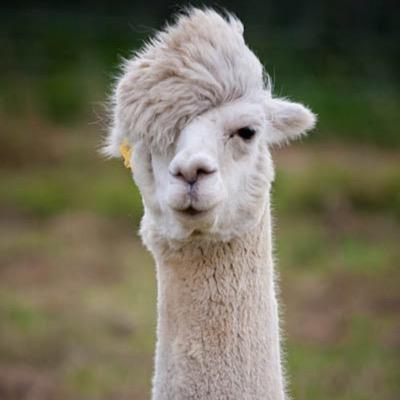

In [ ]:
# 이미지 파일을 색깔 이미지로 화면에 표시

import cv2
from google.colab.patches import cv2_imshow

img_file = "/content/drive/MyDrive/가은/2022/img/sample.jpeg"
img = cv2.imread(img_file, cv2.IMREAD_COLOR)

if img is not None:
  cv2_imshow(img)
  cv2.waitKey()
  cv2.destroyAllWindows()
else:
    print('No image file.')

### 2) 흑백 이미지 출력 (cv2.IMREAD_GRAYSCALE)

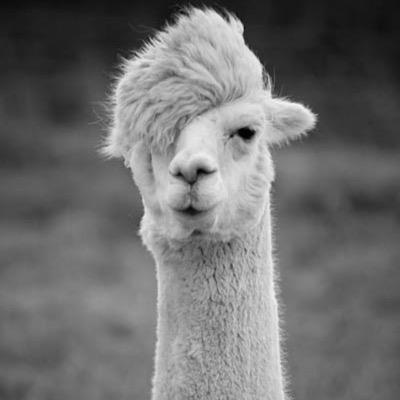

In [ ]:
# 이미지 파일을 회색으로 화면에 표시

import cv2
from google.colab.patches import cv2_imshow

img_file = "/content/drive/MyDrive/가은/2022/img/sample.jpeg"
img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)    # 회색으로 읽기

if img is not None:
  cv2_imshow(img)
  cv2.waitKey()
  cv2.destroyAllWindows()
else:
    print('No image file.')

### 3) 투명도 포함 그대로 출력 (cv2.IMREAD_UNCHANGED)

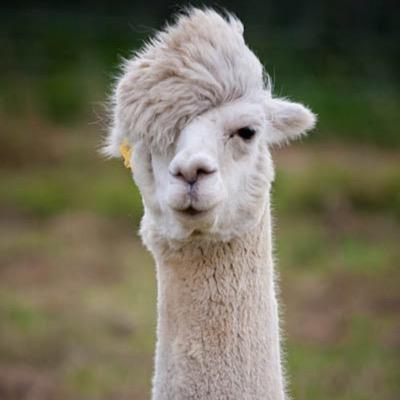

In [ ]:
# 이미지 파일을 투명도 포함해 그대로 이미지 출력

import cv2
from google.colab.patches import cv2_imshow

img_file = "/content/drive/MyDrive/가은/2022/img/sample.jpeg"
img = cv2.imread(img_file, cv2.IMREAD_UNCHANGED)

if img is not None:
  cv2_imshow(img)
  cv2.waitKey()
  cv2.destroyAllWindows()
else:
    print('No image file.')

+) 동영상 파일 읽기

In [ ]:
# 동영상 파일 읽기

import cv2
from google.colab.patches import cv2_imshow

video_file = "/content/drive/MyDrive/가은/2022/img/고양이.mp4" # 동영상 파일 경로

cap = cv2.VideoCapture(video_file) # 동영상 캡쳐 객체 생성  ---①
if cap.isOpened():                 # 캡쳐 객체 초기화 확인
    while True:
        ret, img = cap.read()      # 다음 프레임 읽기      --- ②
        if ret:                     # 프레임 읽기 정상
            cv2_imshow(img) # 화면에 표시  --- ③
            cv2.waitKey(5)            # 5ms 지연  --- ④
        else:                       # 다음 프레임 읽을 수 없음
            break                   # 재생 완료
else:
    print("can't open video.")      # 캡쳐 객체 초기화 실패
cap.release()                       # 캡쳐 자원 반납
cv2.destroyAllWindows()

+) 노트북 캠 읽기

In [ ]:
import cv2

cap = cv2.VideoCapture(0)               # 0번 카메라 장치 연결 ---①
if cap.isOpened():                      # 캡쳐 객체 연결 확인
    while True:
        ret, img = cap.read()           # 다음 프레임 읽기
        if ret:
            cv2.imshow('video',img)             # 다음 프레임 이미지 표시
            if cv2.waitKey(1) != -1:    # 1ms 동안 키 입력 대기 ---②
                break                   # 아무 키라도 입력이 있으면 중지
        else:
            print('no frame')
            break
else:
    print("can't open camera.")
cap.release()                           # 자원 반납
cv2.destroyAllWindows()

can't open camera.


- 카메라 장치 번호는 0부터 시작
- 웹캠이 하나밖에 없다면 인자로 0을 넣기

## 2. 이미지 저장

cv2.imwirte(path, img, params)

* filename : 저장할 영상 파일 이름
* img : 저장할 영상 데이터
* params : 파일 저장 옵션 지정

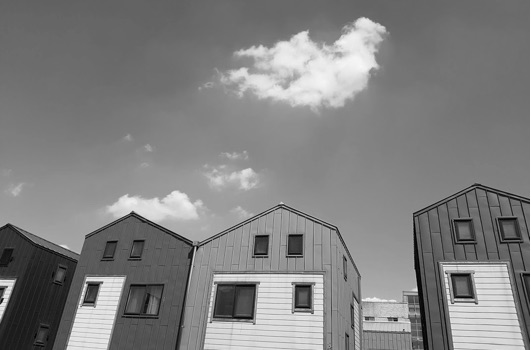

In [ ]:
# 이미지 저장하기 (img_write.py)

import cv2

img_file = '/content/drive/MyDrive/가은/2022/img/house.jpg'
save_file = '/content/drive/MyDrive/가은/2022/img/house_gray.jpg'

img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
cv2.imwrite(save_file, img) #파일로 저장, 포맷은 확장에 따름
cv2.waitKey()
cv2.destroyAllWindows()

### +) 비디오 저장하기 (웹캠)

In [ ]:
import cv2

cap = cv2.VideoCapture(0)  # 0이 의미하는 것은 노트북에 내장된 카메라의 고유 지정번호

width = int(cap.get(3)) # 가로 길이 가져오기 
height = int(cap.get(4)) # 세로 길이 가져오기
fps = 20

fcc = cv2.VideoWriter_fourcc('M', 'J', 'P', 'G')
out = cv2.VideoWriter('webcam_record.avi', fcc, fps, (width, height), isColor=False)
print(out.isOpened())
while (True) :
    ret, frame = cap.read()
    if ret :
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        out.write(gray)
        cv2.imshow('frame', gray)

        if cv2.waitKey(1) & 0xFF == ord('q') : break
    else :
        print("Fail to read frame!")
        break

cap.release()
out.release()
cv2.destroyAllWindows()